# Linear Regression (1 Feature)

<ipython-input-4-5bfade439d1f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-4-5bfade439d1f>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut=N)


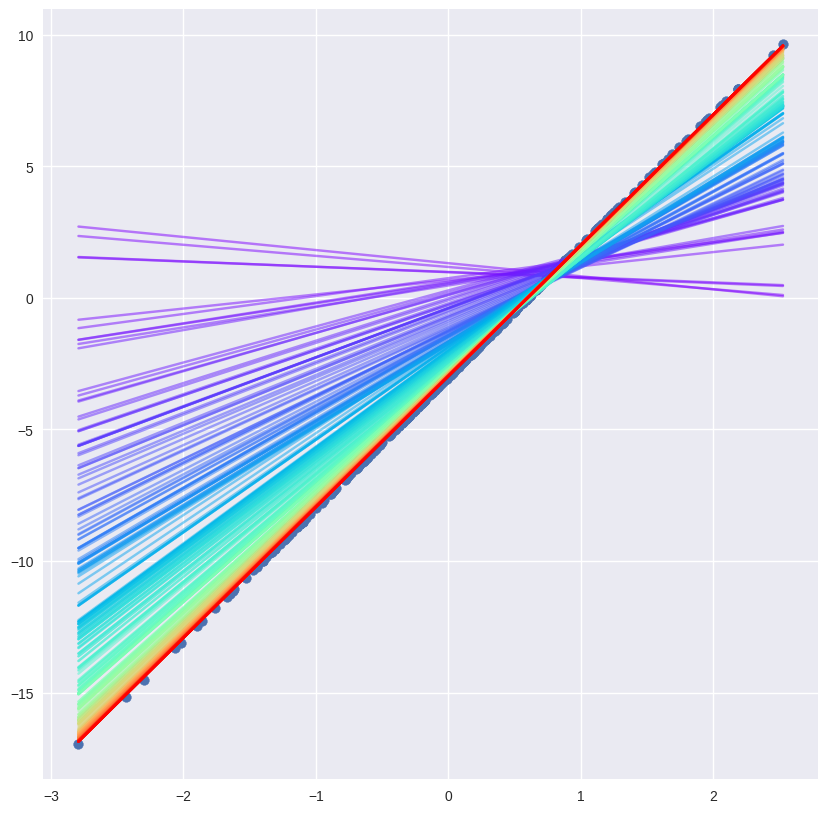

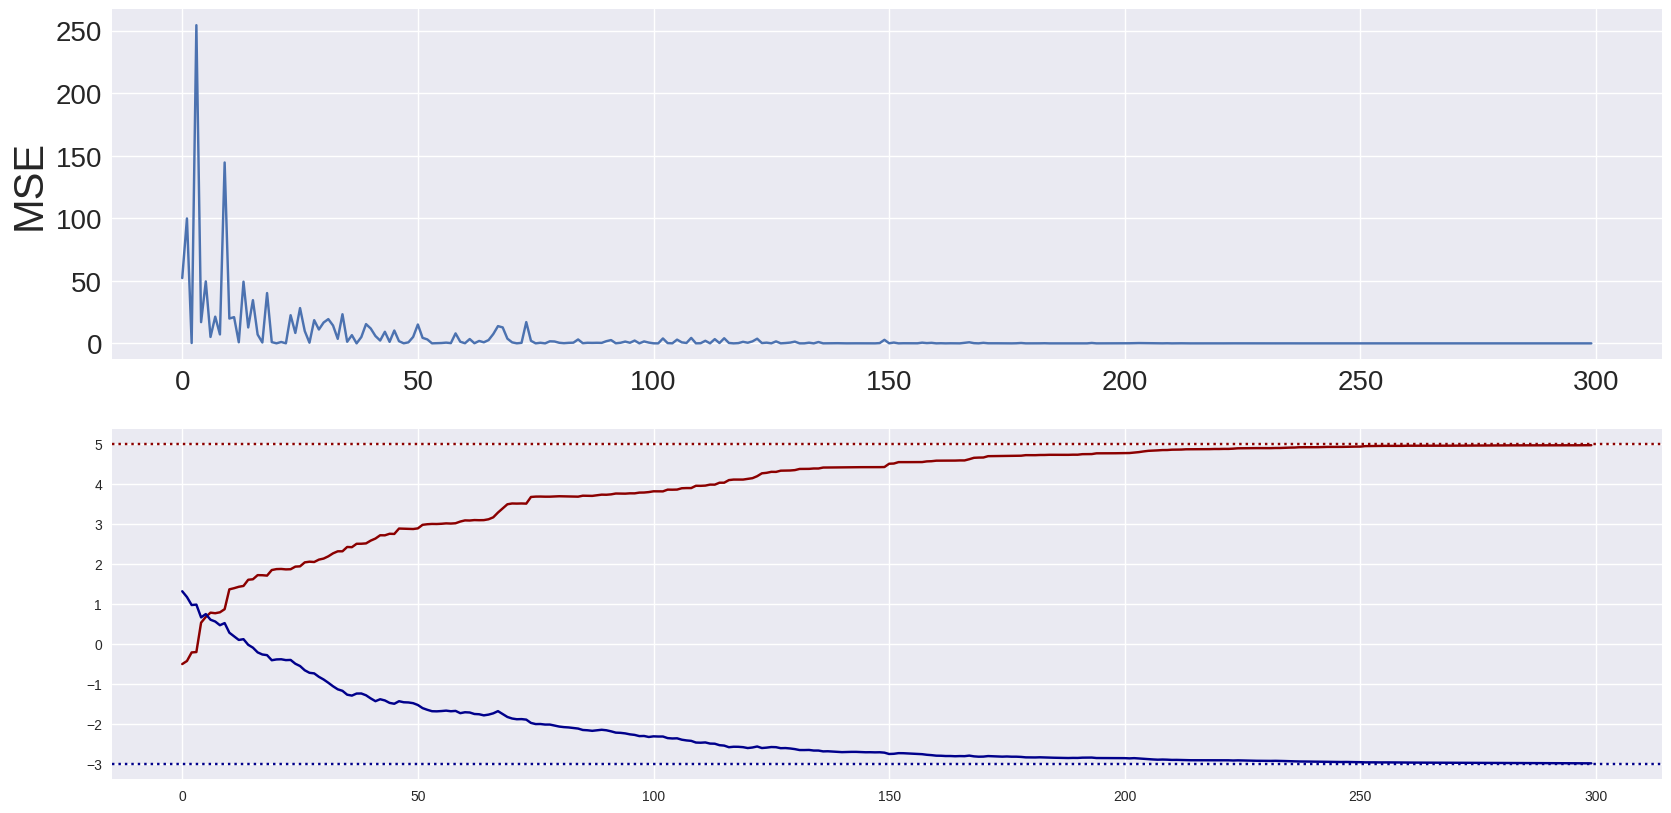

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

# set params
N = 300        # data 개수
lr = 0.01
t_w, t_b = 5, -3      # target (정답모델)
w, b = np.random.uniform(-3, 3, 2)      # trainable variables 2개를 뽑겠다. (-3~3)

# generate dataset
x_data = np.random.randn(N, )
y_data = x_data * t_w + t_b
# 바이어스 주는거 ?? 0.5곱?

cmap = cm.get_cmap('rainbow', lut=N)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)

# ax.set_ylabel('MSE', fontsize=30)
# ax.tick_params(labelsize=20)

x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track = list()
b_track = list()

# train model and visualize updated models
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
  w_track.append(w)
  b_track.append(b)

  # visualize updated model
  y_range = w * x_range + b
  ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.5)

  # forward propagation
  pred = x * w + b
  J = (y - pred) ** 2
  J_track.append(J)

  # jacobians
  dJ_dpred = -2 * (y - pred)
  dpred_dw = x
  dpred_db = 1

  # backpropagation
  dJ_dw = dJ_dpred * dpred_dw
  dJ_db = dJ_dpred * dpred_db

  w = w - lr * dJ_dw
  b = b - lr * dJ_db


# visualize results
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(w_track, color='darkred')
axes[1].plot(b_track, color='darkblue')

axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[0].tick_params(labelsize=20)


# Linear Regression (N Feature)

<ipython-input-19-e6d4a49a2ba1>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-19-e6d4a49a2ba1>:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', lut=n_feature)


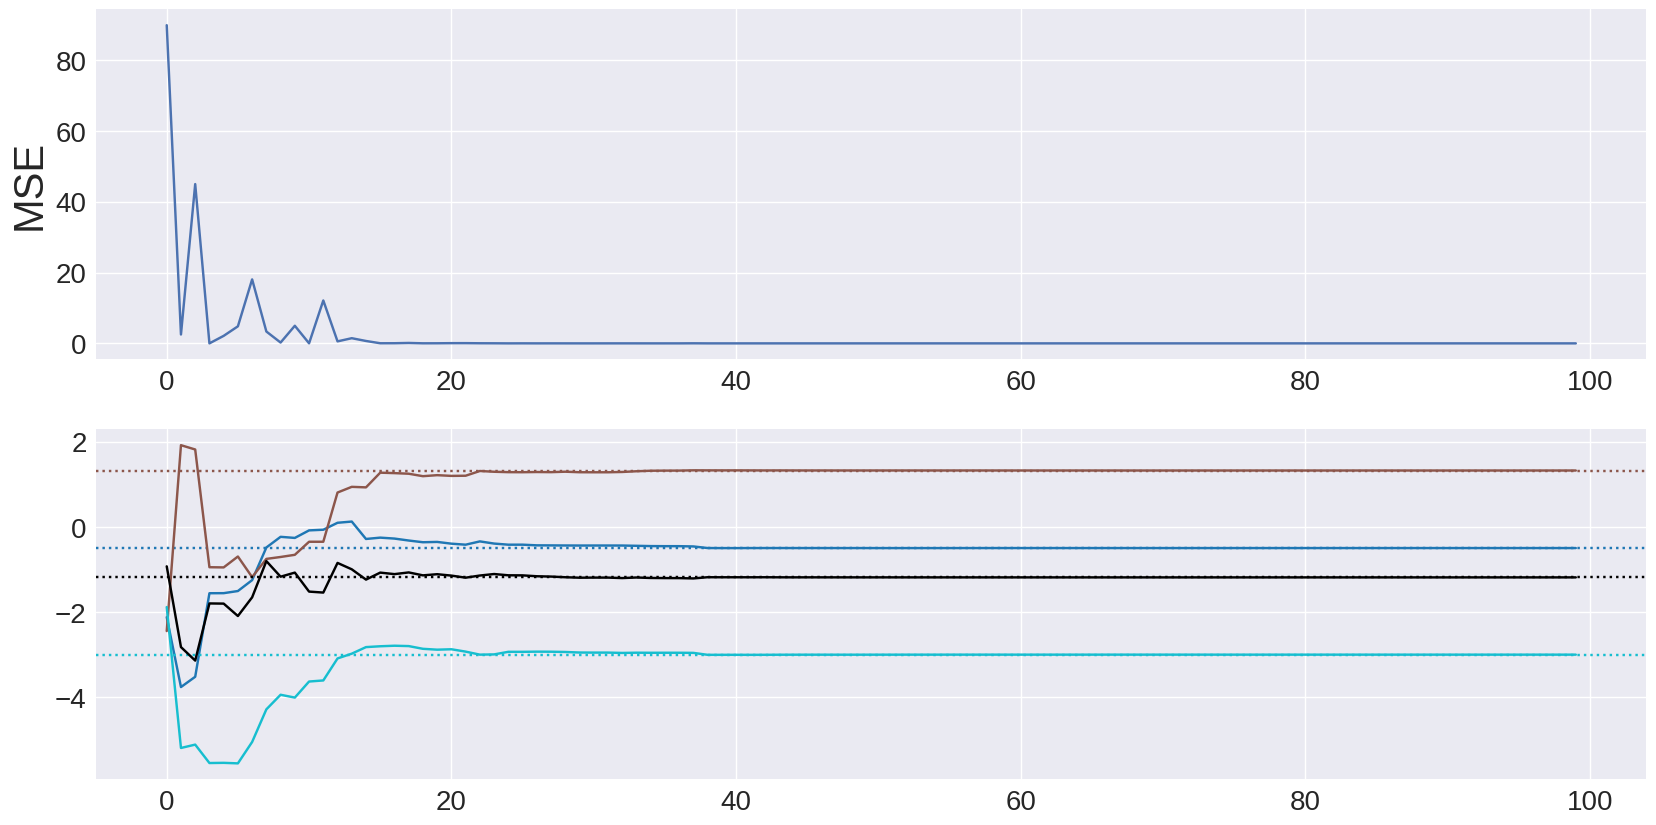

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 100, 3
lr = 0.1
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, 1))      # 형태맞춰주기

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, 1))

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b    # @ is matrix multiplication / same with np.matmul()

# print(x_data.shape, t_W.shape, t_b.shape)
# print(y_data.shape)

J_track = list()
W_track, b_track = list(), list()
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
  W_track.append(W)
  b_track.append(b)

  # forward propagation
  X = X.reshape(1, -1)
  # print(X.shape, W.shape, b.shape)
  pred = X @ W + b
  J = (y - pred) ** 2
  # print(J.squeeze().shape)/
  J_track.append(J.squeeze())

  # jacobians
  dJ_dpred = -2 * (y - pred)
  dpred_dW = X    # 이미 전치시켰기때문에 ㄱㅊ
  dpred_db = 1

  # backpropagation
  dJ_dW = dJ_dpred * dpred_dW
  dJ_db = dJ_dpred * dpred_db

  # parameter update
  W = W - lr * dJ_dW.T
  b = b - lr * dJ_db

# print(len(W_track))
# print(W_track[0].shape)

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track).flatten()
# print(W_track.shape, b_track.shape)



# visualize results
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('tab10', lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
  axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
  axes[1].plot(w, color=cmap(w_idx))

axes[1].axhline(y=t_b, color='black', linestyle=':')
axes[1].plot(b_track, color='black')
axes[1].tick_params(labelsize=20)
